In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from math import *
# Fixing random state for reproducibility
np.random.seed(123)

cov_pred = covariance matrix predicted  
cov_test = test covariance matrix

'qoverp', 'lambda', 'phi', 'dxy', 'dsz'

|0  1  2  3  4 |  
|1  5  6  7  8 |  
|2  6  9  10 11|  
|3  7  10 12 13|  
|4  8  11 13 14|  

In [2]:
cov_pred = np.load('/Users/HP/Desktop/cov_pred_enc5_4.npy')
cov_test = np.load('/Users/HP/Desktop/cov_test_enc5_4.npy')

cov_encoded = encoded covariance matrix

In [3]:
cov_encoded = np.load('/Users/HP/Desktop/cov_enc_enc5_4.npy')

In [4]:
def plot_hist(x, n_bins=50, title='', xlabel='element', ylabel='N'):
    plt.hist(x,n_bins)
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.title(title, size=15)
    plt.grid()

def percentile_matrix(cov,p):
    s = cov.sum()
    if s >= 0:
        pcov = cov[abs(cov) < np.percentile(cov,p)]
        return pcov
    elif s < 0:
        pcov = cov[abs(cov) > -np.percentile(-cov,p)]
        return pcov

def hist_res(res, n_bins=50, title='', x_label='x label',
             y_label='Residuals'):
    '''Take residuals and plot histogram. 
    '''
    plt.hist(res, n_bins)
    plt.title(title, size=15)
    plt.xlabel(x_label, size=12)
    plt.ylabel(y_label, size=12)
    plt.grid()

Get scalar array and rescalate cov_pred and cov_test.

In [5]:
scal = np.load('/Users/HP/Desktop/scal.npy')

#plt.figure(100)
#plt.hist(scal[scal<np.percentile(scal,60)])

cov_pred = np.transpose(np.transpose(cov_pred)*scal)
cov_test = np.transpose(np.transpose(cov_test)*scal)

Compute Mean Absolute Relative Error and Mean Absolute Error

In [6]:
mean_relative_absolute_error = np.zeros(15)
mean_absolute_error = np.zeros(15)

for i in range(15):
    a = np.abs((cov_test[:,i] - cov_pred[:,i])/cov_test[:,i])
    b = np.abs(cov_test[:,i] - cov_pred[:,i])
    mean_relative_absolute_error[i] = a.mean()
    mean_absolute_error[i] = b.mean()

    print(f'i = {i}: Mean Relative Absolute Error = {mean_relative_absolute_error[i]}\n       Mean Absolute Error = {mean_absolute_error[i]}\n')

i = 0: Mean Relative Absolute Error = 0.8176961070801944
       Mean Absolute Error = 8.529164220004459e-05

i = 1: Mean Relative Absolute Error = 20.12417541212609
       Mean Absolute Error = 2.119794850366776e-05

i = 2: Mean Relative Absolute Error = 0.4332045686332517
       Mean Absolute Error = 2.6961715220064263e-05

i = 3: Mean Relative Absolute Error = 0.06316534720877713
       Mean Absolute Error = 6.65914952296657e-05

i = 4: Mean Relative Absolute Error = 1.6909165880525905
       Mean Absolute Error = 0.00010021662876873141

i = 5: Mean Relative Absolute Error = 0.4724327698732182
       Mean Absolute Error = 3.63466363311296e-05

i = 6: Mean Relative Absolute Error = 7.6078698140898355
       Mean Absolute Error = 1.4878428035575743e-05

i = 7: Mean Relative Absolute Error = 2.05425368647835
       Mean Absolute Error = 0.0001247793300929256

i = 8: Mean Relative Absolute Error = 0.050094060271683484
       Mean Absolute Error = 0.0001264390311870093

i = 9: Mean Relati

Plot histograms with relative error ((predicted_data - test_data)/test_data) and error (predicted_data - test_data).

i = 0


C:\Users\HP\AppData\Local\Temp\ipykernel_7172\2236431347.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


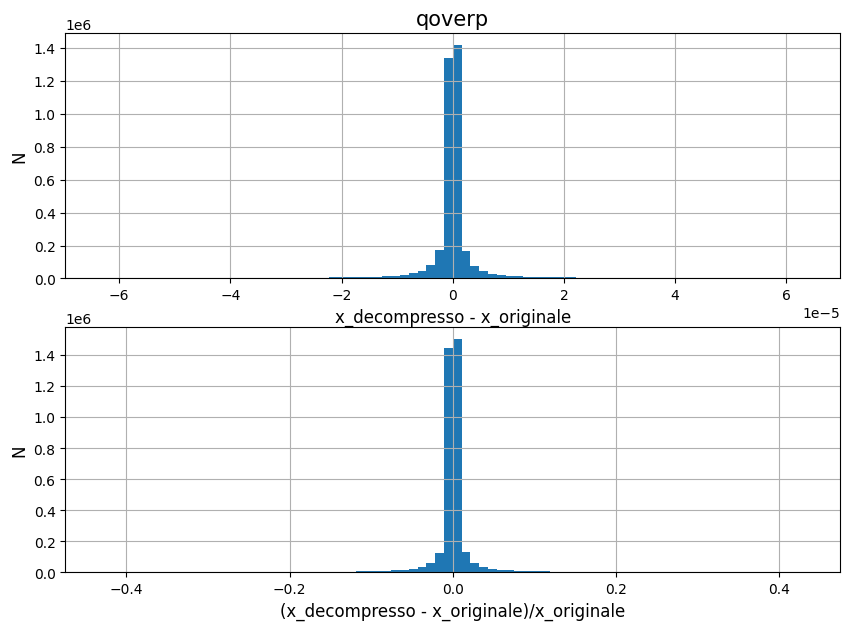

i = 5


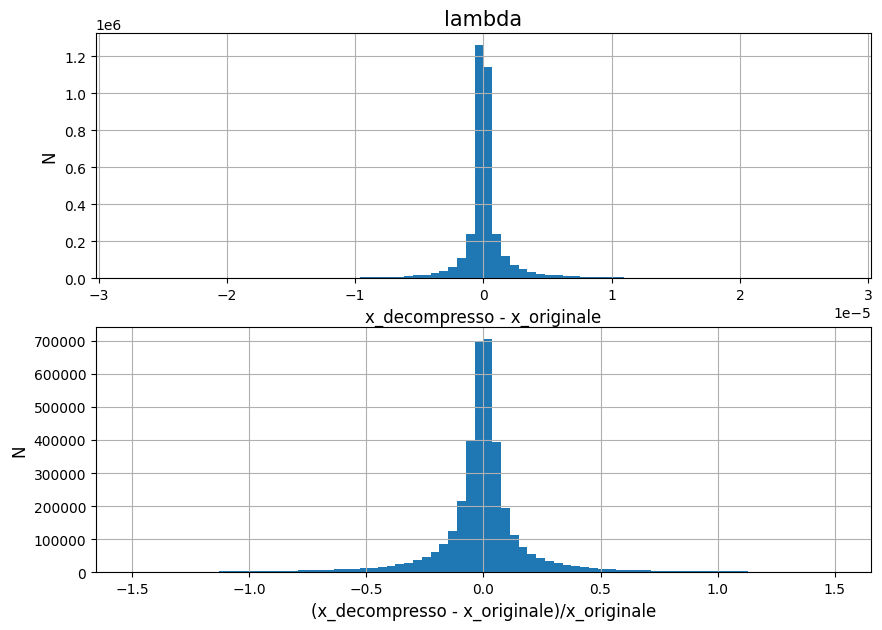

i = 9


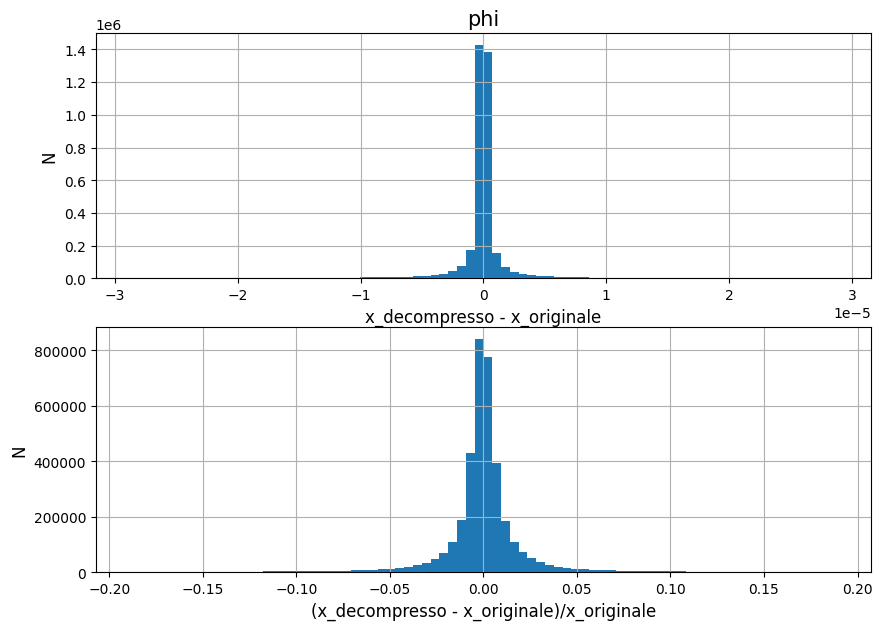

i = 12


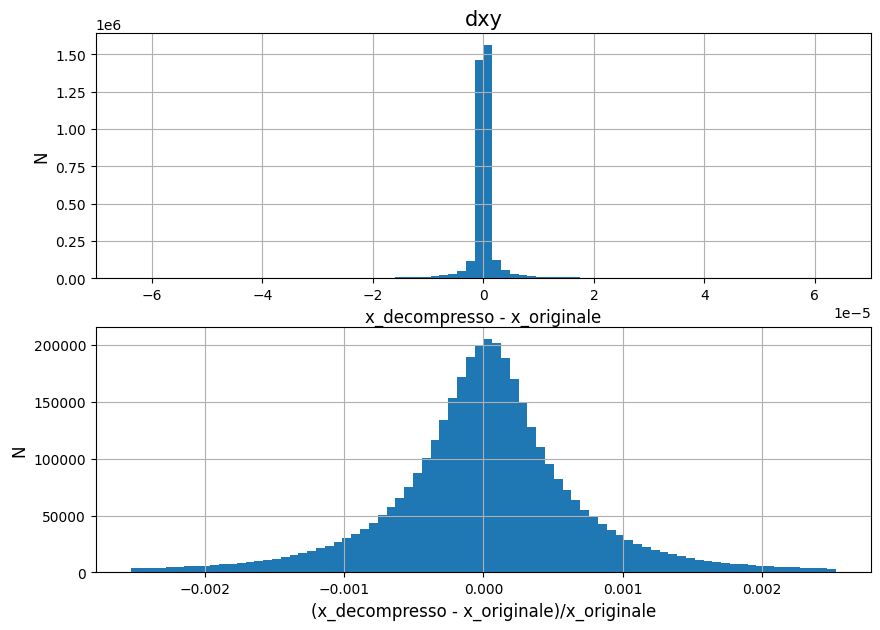

i = 14


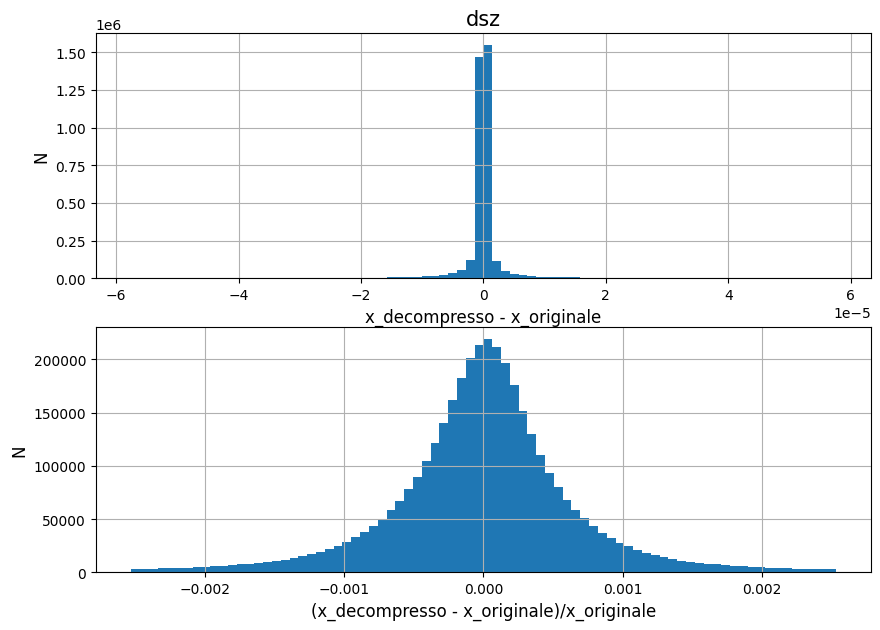

In [7]:
index = [0, 5, 9, 12, 14]
titles = ['qoverp', 'lambda', 'phi', 'dxy', 'dsz']
# Da applicare taglio
    
for i, elem in enumerate(index):
    print(f'i = {elem}')
    res = (cov_test[:, elem] - cov_pred[:, elem])
    res_norm = (cov_test[:, elem] - cov_pred[:, elem])/cov_test[:, elem]
    #Calculate residuals.
    plt.figure(10+i,figsize=[10,7])
    plt.title(titles[i],size=15)

    plt.subplot(2,1,1)
    perc = np.percentile(abs(res),95)
    hist_res(res[(res<perc) & (res>-perc)], n_bins=80, y_label='N', x_label = 'x_decompresso - x_originale')
    plt.title(titles[i],size=15)

    plt.subplot(2,1,2)
    perc = np.percentile(abs(res_norm),95)
    hist_res(res_norm[(res_norm<perc) & (res_norm>-perc)], n_bins=80, y_label='N', x_label = '(x_decompresso - x_originale)/x_originale')
    plt.show()

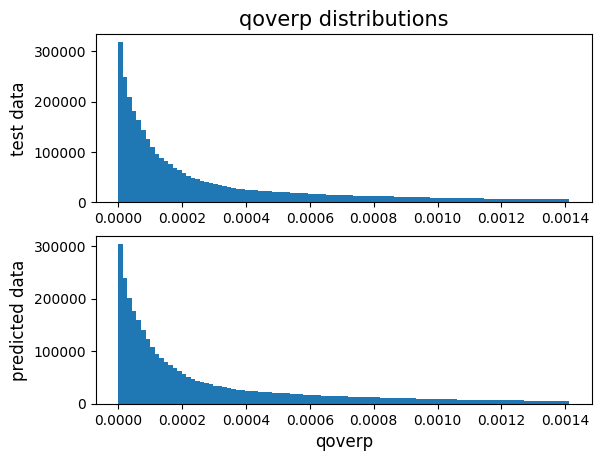

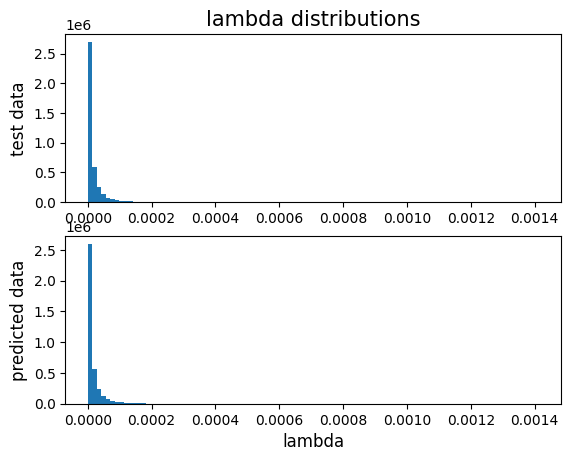

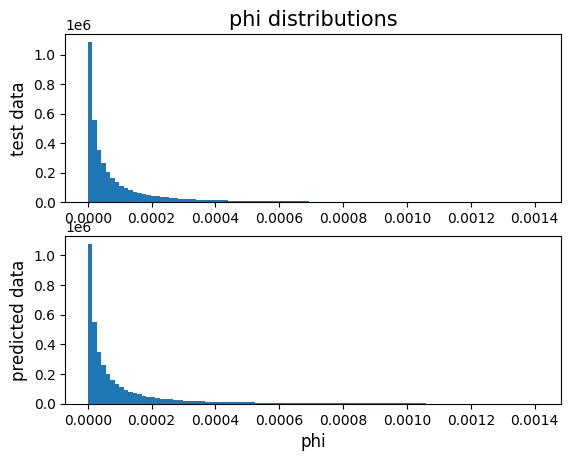

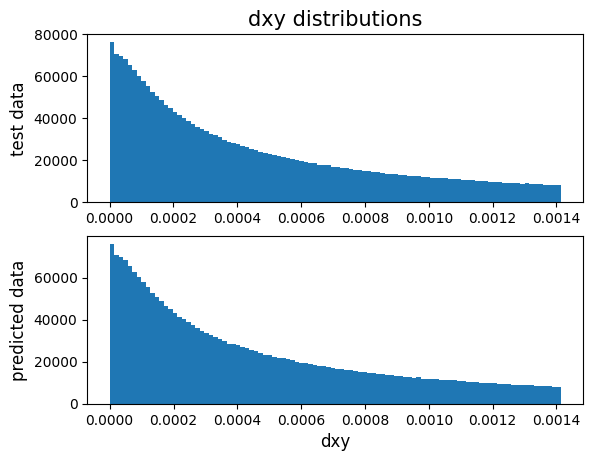

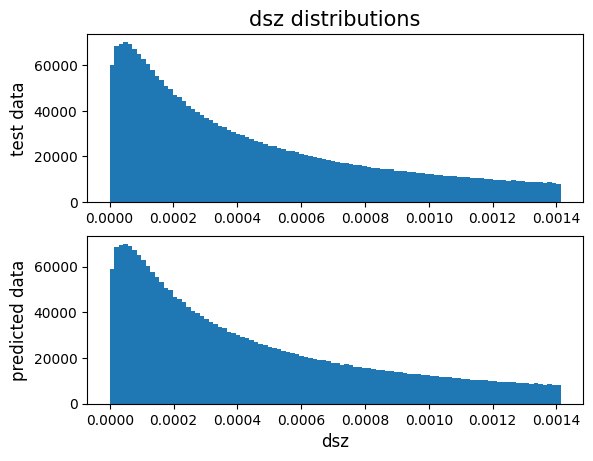

In [8]:
index = [0, 5, 9, 12, 14]
titles = ['qoverp', 'lambda', 'phi', 'dxy', 'dsz']
perc = np.percentile(abs(cov_test),90)
for i, elem in enumerate(index):
    test = cov_test[:,elem]
    pred = cov_pred[:,elem]
    plt.figure(30+i)
    plt.subplot(2,1,1)
    plt.title(titles[i]+' distributions', size=15)
    plt.ylabel('test data',size=12)
    plt.hist(test[(test<perc) & (test>-perc)],100)
    plt.subplot(2,1,2)
    plt.ylabel('predicted data',size=12)
    plt.hist(pred[(pred<perc) & (pred>-pred)],100)
    plt.xlabel(titles[i],size=12)
    plt.show()

Analyze encoded matrix distributions

(3934112, 5)
[0.2145 0.4143 0.565  0.3464 0.4827]
10
[0.5551509  0.39478937 0.2266532  0.5168023  0.39693382]
20


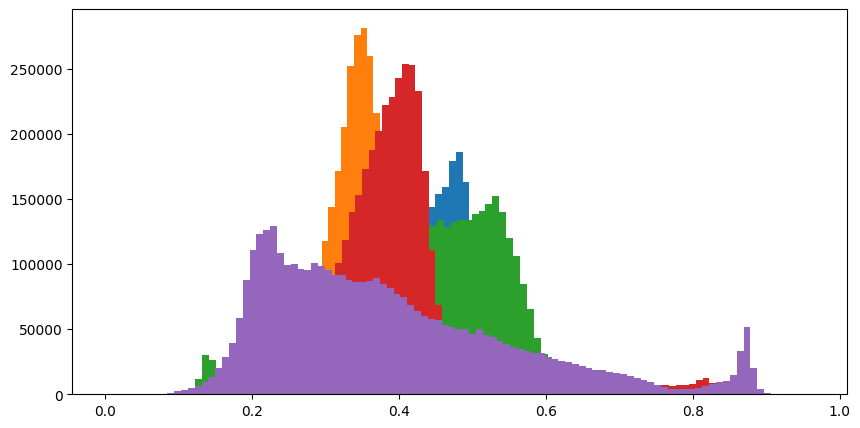

In [11]:
encoded2 = np.load('/Users/HP/Desktop/cov_enc_enc5_3.npy')
print(cov_encoded.shape)
print(cov_encoded[0,:])
print(cov_encoded[0,:].nbytes)
print(encoded2[0,:])
print(encoded2[0,:].nbytes)

plt.figure(30, figsize=[10,5])
plt.hist(cov_encoded[:,4],100)
plt.hist(cov_encoded[:,3],100)
plt.hist(cov_encoded[:,2],100)
plt.hist(cov_encoded[:,1],100)
plt.hist(cov_encoded[:,0],100)
plt.show()

In [15]:
cov_pred2 = np.load('/Users/HP/Desktop/cov_pred_enc6.npy')
cov_test2 = np.load('/Users/HP/Desktop/cov_test_enc6.npy')

cov_pred2 = np.transpose(np.transpose(cov_pred2)*scal)
cov_test2 = np.transpose(np.transpose(cov_test2)*scal)

arr = cov_test == cov_test2
for e in arr:
    for a in e:
        if a == False: print('False!')

In [ ]:


mean_relative_absolute_error = np.zeros(15)
mean_absolute_error = np.zeros(15)

mean_relative_absolute_error2 = np.zeros(15)
mean_absolute_error2 = np.zeros(15)

for i in range(15):
    a = np.abs((cov_test[:,i] - cov_pred[:,i])/cov_test[:,i])
    b = np.abs(cov_test[:,i] - cov_pred[:,i])
    a2 = np.abs((cov_test2[:,i] - cov_pred2[:,i])/cov_test2[:,i])
    b2 = np.abs(cov_test2[:,i] - cov_pred2[:,i])
    mean_relative_absolute_error[i] = a.mean()
    mean_absolute_error[i] = b.mean()
    mean_relative_absolute_error2[i] = a2.mean()
    mean_absolute_error2[i] = b2.mean()
    print(f'i = {i}')
    print(f'Mean Relative Absolute Error: model1 = {mean_relative_absolute_error[i]}, model2 = {mean_relative_absolute_error2[i]}, model1 better than model2? {mean_relative_absolute_error[i] < mean_relative_absolute_error2[i]}')
    print(f'Mean Absolute Error: model1 = {mean_absolute_error[i]}, model2 = {mean_absolute_error2[i]}, model1 better than model2? {mean_absolute_error[i] < mean_absolute_error2[i]}')
